In [81]:
import pandas as pd
import numpy as np
import matplotlib
from plotnine import *
import viridis as vd


# Carga de los datos

In [82]:
obesidad = pd.read_csv("Data/obesity.csv")

|Variable Name|	Role|	Type	|Demographic	|Description|	Units	|Missing Values|
|----------|:---------|:---------|:---------|:---------|:---------|:---------|
|Gender|	Feature|	Categorical|	Gender|			| |no|
|Age|	Feature|	Continuous|	Age|	 |		|no|
|Height|	Feature|	Continuous|		 |		| |no|
|Weight|	Feature|	Continuous|		 |		| |no|
|family_history_with_overweight|	Feature|	Binary|	| 	Has a family member suffered or suffers from overweight?|		|no|
|FAVC|	Feature|	Binary|	  | Do you eat high caloric food frequently?|		|no|
|FCVC|	Feature|	Integer|	 | Do you usually eat vegetables in your meals?|		|no|
|NCP|	Feature|	Continuous|	 | How many main meals do you have daily?|		|no|
|CAEC|	Feature|	Categorical|  | Do you eat any food between meals?|		|no|
|SMOKE|	Feature|	Binary|	| Do you smoke?|		|no|
|CH2O|	Feature|	Continuous|		|How much water do you drink daily?|		|no|
|SCC|	Feature|	Binary|		|Do you monitor the calories you eat daily?|		|no|
|FAF|	Feature|	Continuous|		|How often do you have physical activity?|		|no|
|TUE|	Feature|	Integer|		|How much time do you use technological devices such as cell phone, videogames, television, computer and others?|		|no|
|CALC|	Feature|	Categorical|		|How often do you drink alcohol?|		|no|
|MTRANS|	Feature|	Categorical|		|Which transportation do you usually use?|		|no|
|NObeyesdad|	Target|	Categorical|		|Obesity level|		|no|

# Procesado de los datos

In [83]:
obesidad.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [84]:
obesidad.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Cambiamos el nombre de las columnas para facilitar la comprensión

In [85]:
obesidad.columns = ['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'obesity_type']

En principio no tiene NAs, pero vamos a asegurarnos

In [86]:
obesidad_sin_nulos = obesidad.dropna()

Veamos si sus caracteristicas sin las mismas

In [87]:
print(obesidad_sin_nulos.shape,obesidad.shape,'son iguales')

(2111, 17) (2111, 17) son iguales


Ahora veamos si hay algun outlier o algún dato incorrecto

In [88]:
columnas_no_numericas=obesidad.select_dtypes(exclude='number').columns
for campo in columnas_no_numericas:
    print(obesidad[campo].unique())
print('Entre los campos no numéricos no se ve ningún elemento incorrecto, pero vamos a dar categorias para poder hacer\nuna buena visualizacion')

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
Entre los campos no numéricos no se ve ningún elemento incorrecto, pero vamos a dar categorias para poder hacer
una buena visualizacion


In [89]:
#Para tipos de obesidad
orden_categorias = ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III']
obesidad['obesity_type'] = pd.Categorical(obesidad['obesity_type'], categories=orden_categorias, ordered=True)
#Para CAEC, ¿comes entre comidas?
orden_categorias = ['no', 'Sometimes', 'Frequently', 'Always']
obesidad['CAEC'] = pd.Categorical(obesidad['CAEC'], categories=orden_categorias, ordered=True)
#Para CALC, ¿bebes alcohol?
orden_categorias = ['no', 'Sometimes', 'Frequently', 'Always']
obesidad['CALC'] = pd.Categorical(obesidad['CALC'], categories=orden_categorias, ordered=True)

Ahora estudiemos las numéricas

In [90]:
obesidad.select_dtypes(include='number').describe()

,age,height,weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Se puede observar que hay mucha gente joven en el estudio, y muy poca muestra para gente mayor 

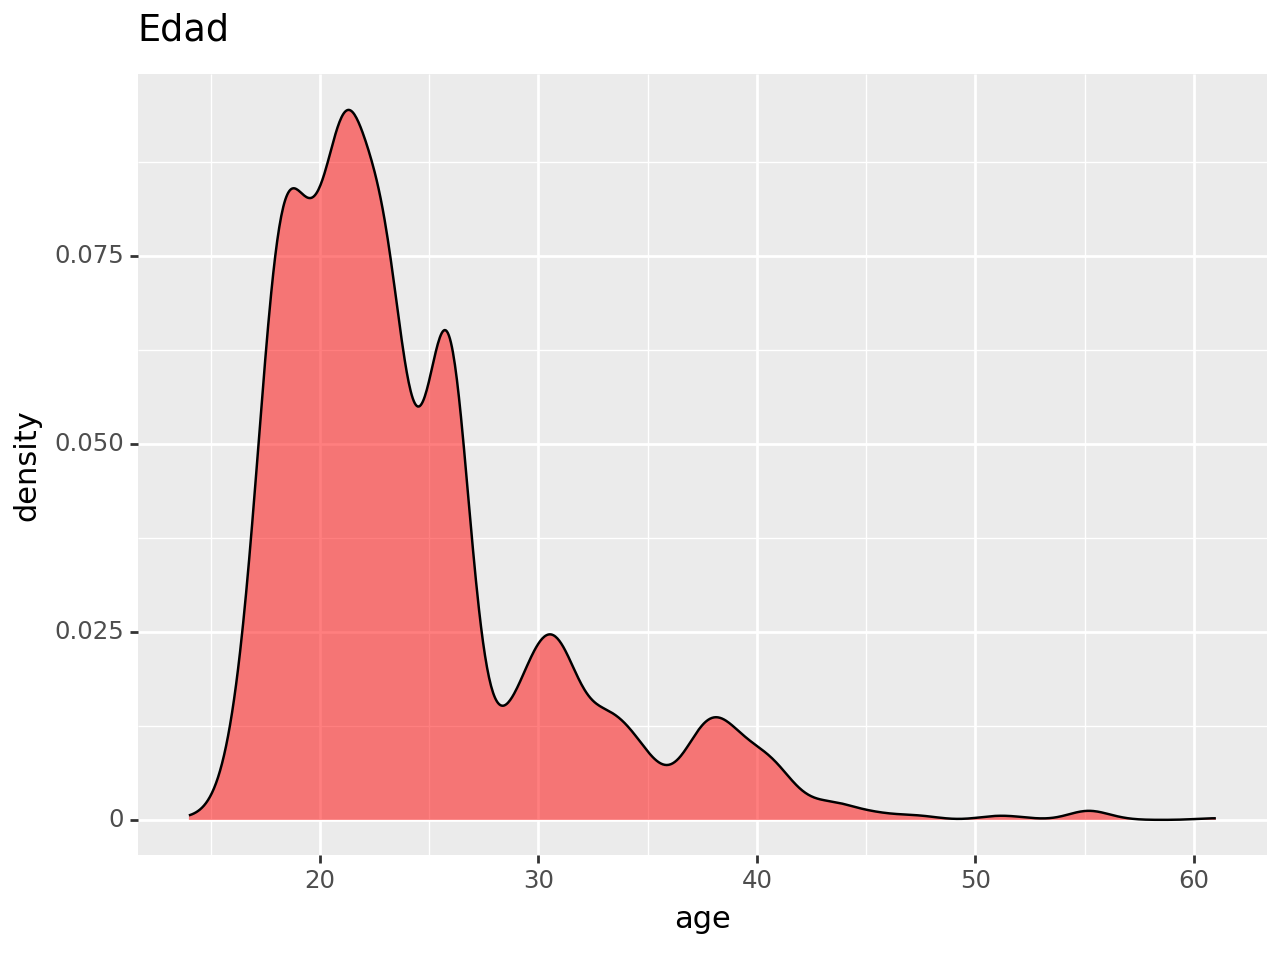


La mayoria de la gente es muy joven, hay baja representatividad de personas mayores


In [91]:
print(ggplot(obesidad, aes(x='age')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='Edad')
)
print('La mayoria de la gente es muy joven, hay baja representatividad de personas mayores')

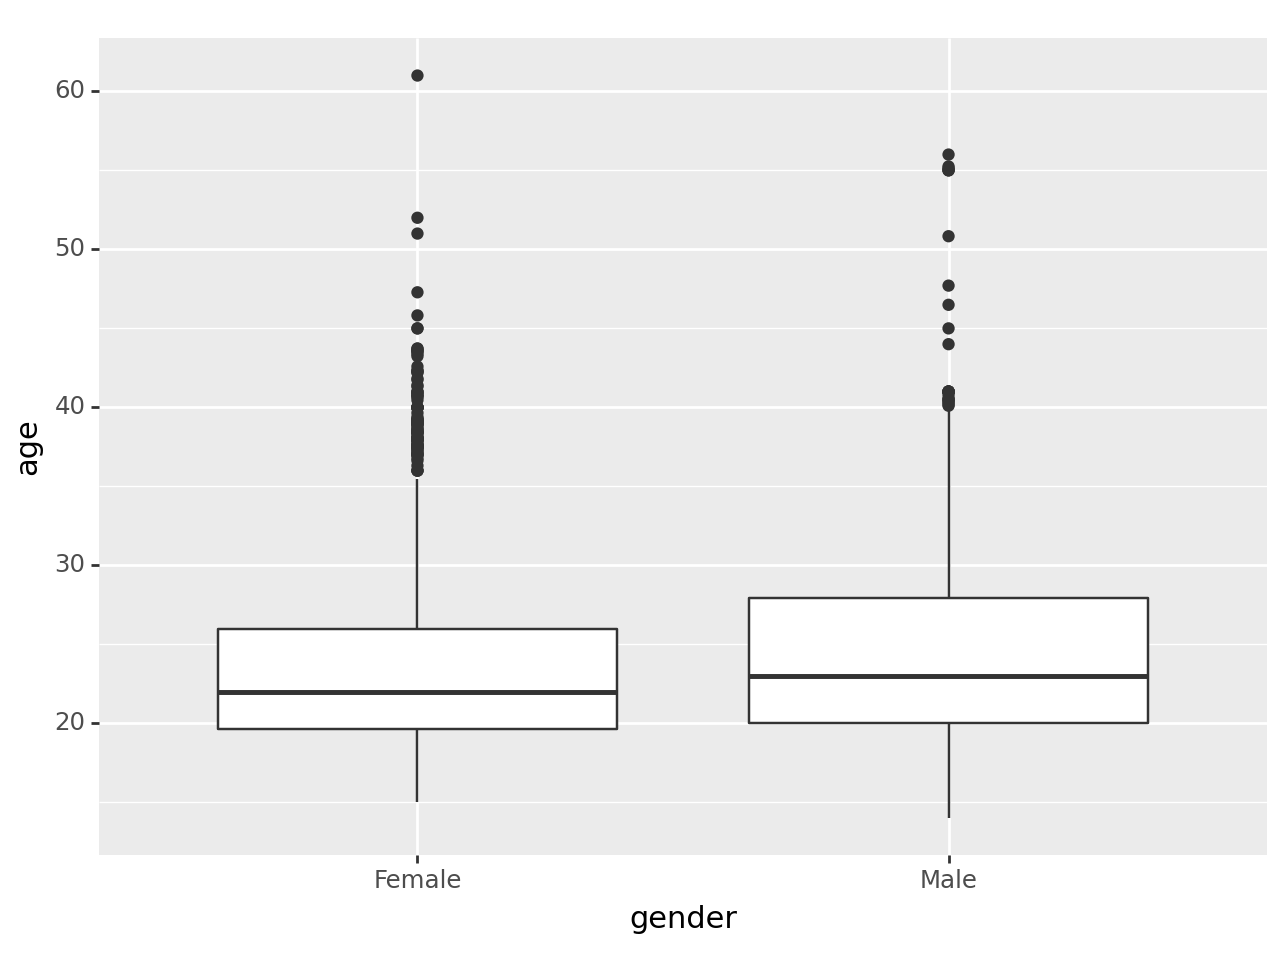

<Figure Size: (640 x 480)>

In [92]:
(ggplot(obesidad, aes(x='gender', y='age')) +
 geom_boxplot())

In [93]:
print('A partir de los 40 años se tiene muy poca representatividad de esta parte la población,\nes por ello que quitamos esos resultados')
obesidad=obesidad.loc[obesidad['age']<=40]

A partir de los 40 años se tiene muy poca representatividad de esta parte la población,
es por ello que quitamos esos resultados


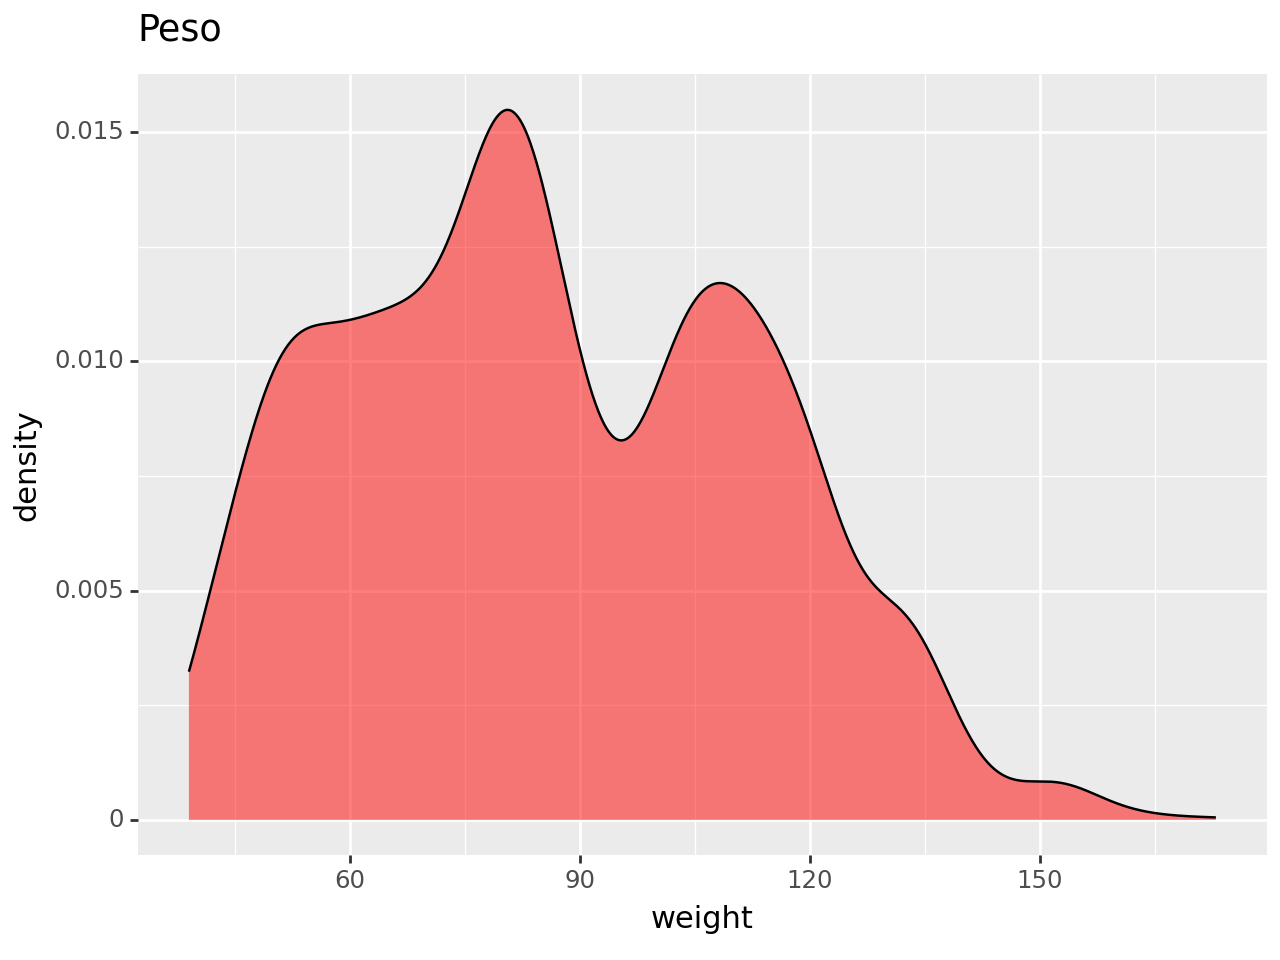


Los datos dados sobre el peso son correctos, tiene un distribución lógica


In [94]:
print(ggplot(obesidad, aes(x='weight')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='Peso')
)
print('Los datos dados sobre el peso son correctos, tiene un distribución lógica')

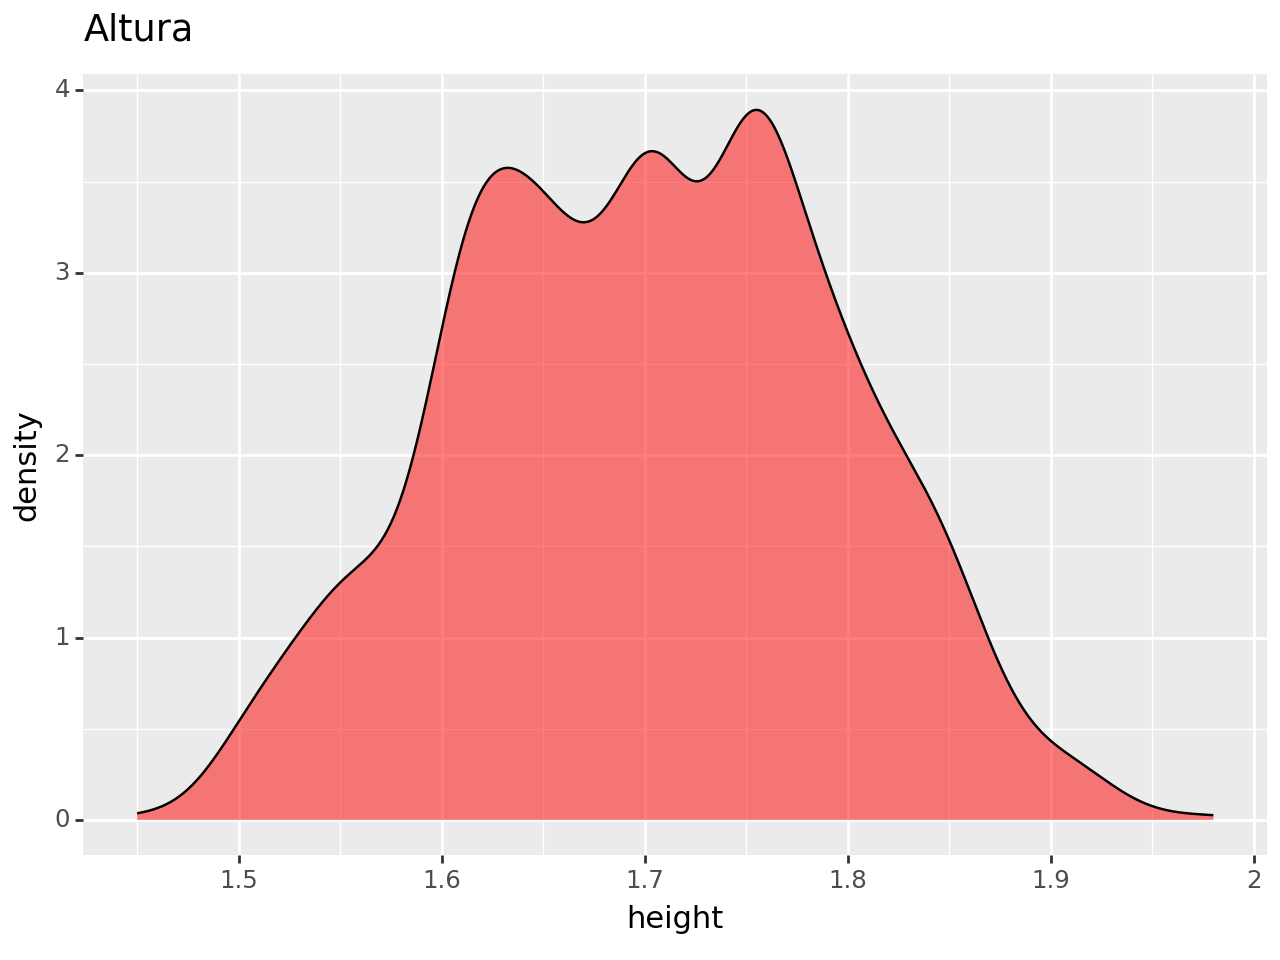


Los datos dados sobre la altura son correctos, tiene un distribución lógica


In [95]:
print(ggplot(obesidad, aes(x='height')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='Altura')
)
print('Los datos dados sobre la altura son correctos, tiene un distribución lógica')

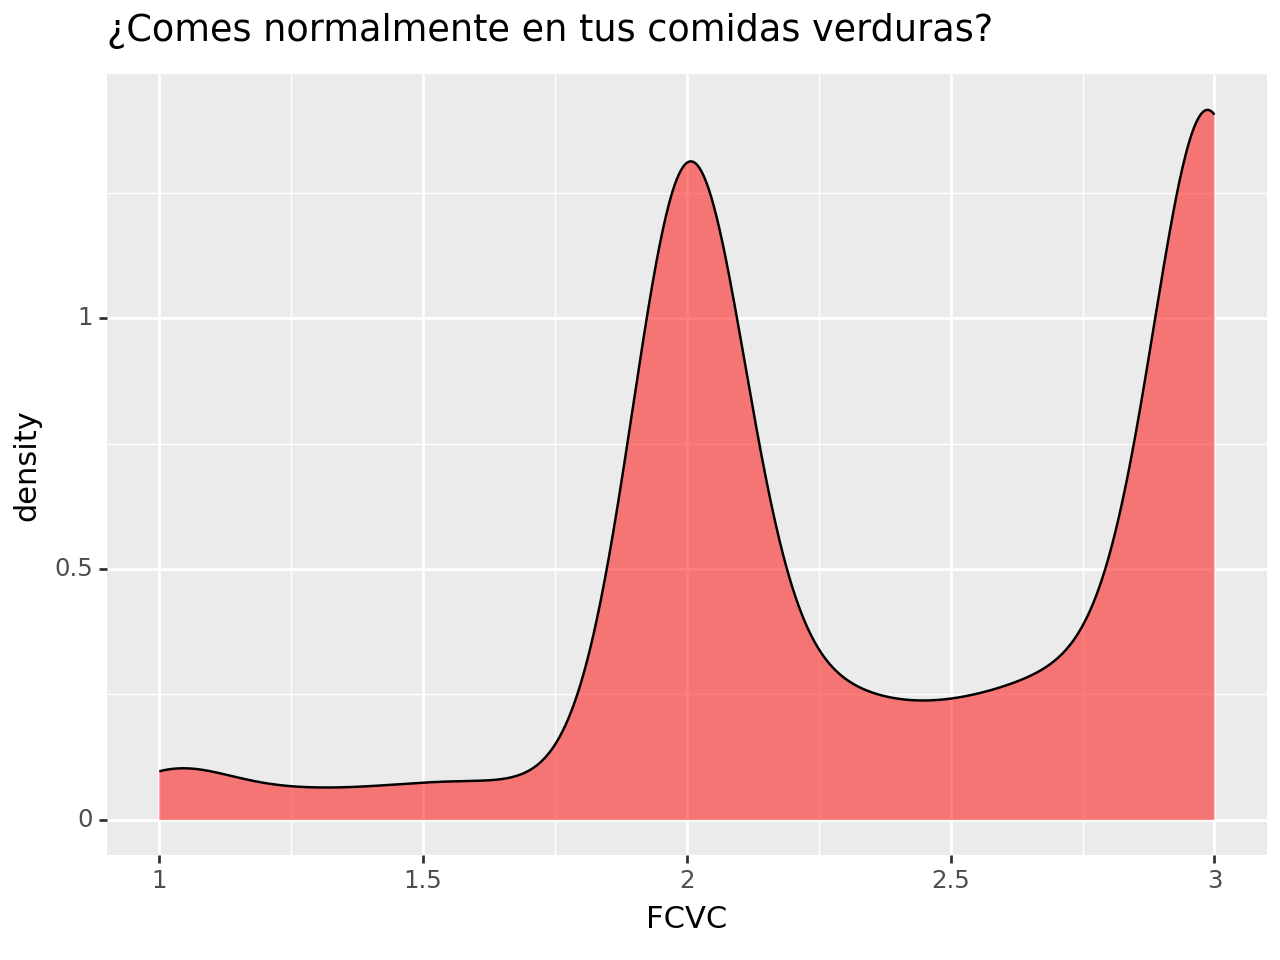


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [96]:
print(ggplot(obesidad, aes(x='FCVC')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='¿Comes normalmente en tus comidas verduras?')
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [97]:
def vegetales(verdura):
    if verdura <= 1.5:
        return "Nunca"
    elif verdura <= 2.5:
        return "Algunas veces"
    else:
        return "Siempre"

obesidad['vegetables'] = obesidad['FCVC'].apply(vegetales)
orden_categorias = ["Nunca","Algunas veces","Siempre"]
obesidad['vegetables'] = pd.Categorical(obesidad['vegetables'], categories=orden_categorias, ordered=True)

C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\2898178892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\2898178892.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [98]:
print(obesidad['vegetables'].unique())

['Algunas veces', 'Siempre', 'Nunca']
Categories (3, object): ['Nunca' < 'Algunas veces' < 'Siempre']


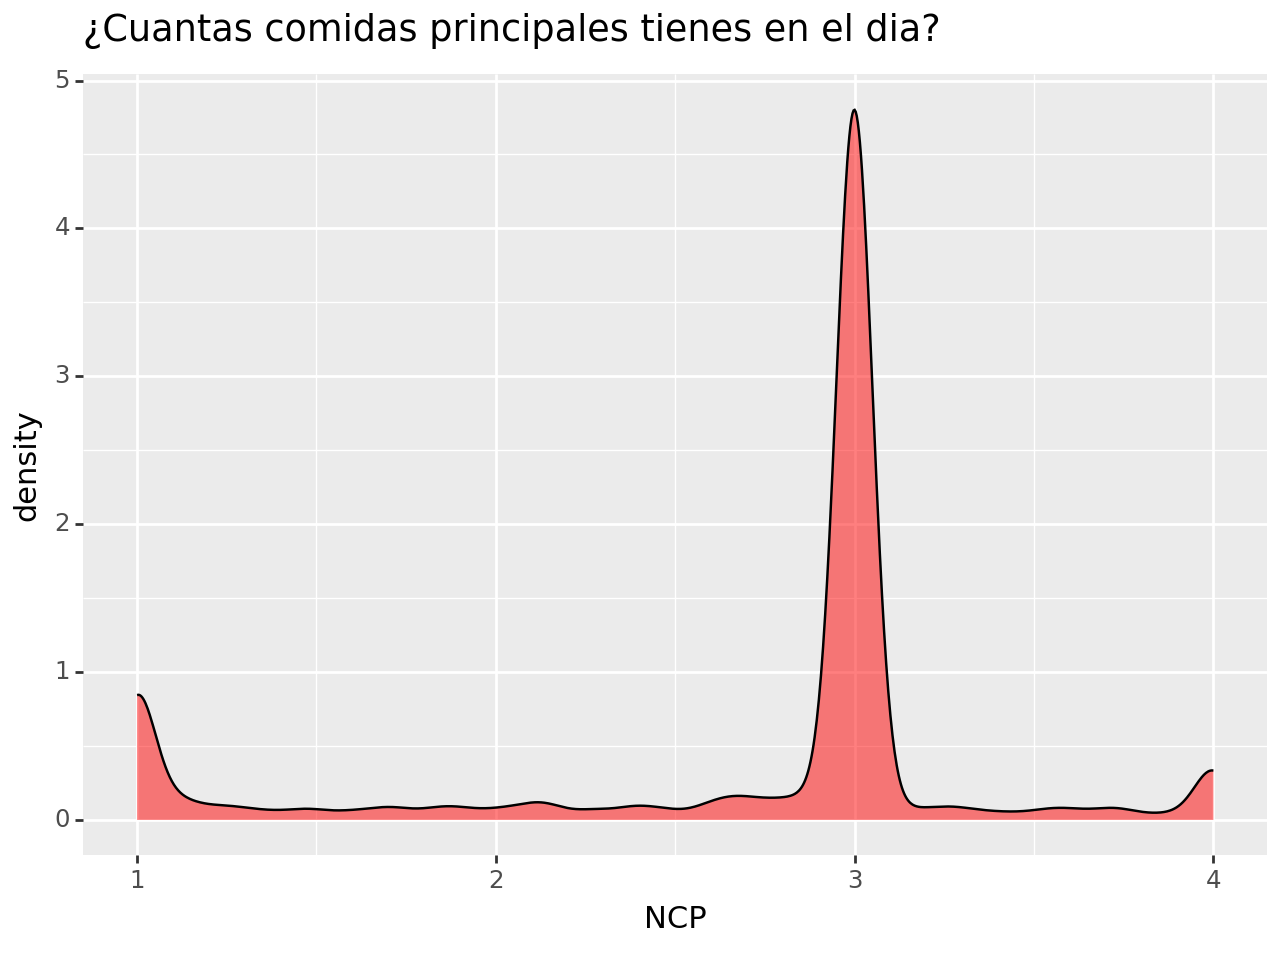


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [99]:
print(ggplot(obesidad, aes(x='NCP')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='¿Cuantas comidas principales tienes en el dia?')
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [100]:
def comidas(comida):
    if comida <= 2:
        return "Entre 1 y 2"
    elif comida <= 3.5:
        return "Tres"
    else:
        return "Más de tres"

obesidad['comidas'] = obesidad['NCP'].apply(comidas)
orden_categorias = ["Entre 1 y 2","Tres","Más de tres"]
obesidad['comidas'] = pd.Categorical(obesidad['comidas'], categories=orden_categorias, ordered=True)

C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\3754721060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\3754721060.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [101]:
print(obesidad['comidas'].unique())

['Tres', 'Entre 1 y 2', 'Más de tres']
Categories (3, object): ['Entre 1 y 2' < 'Tres' < 'Más de tres']


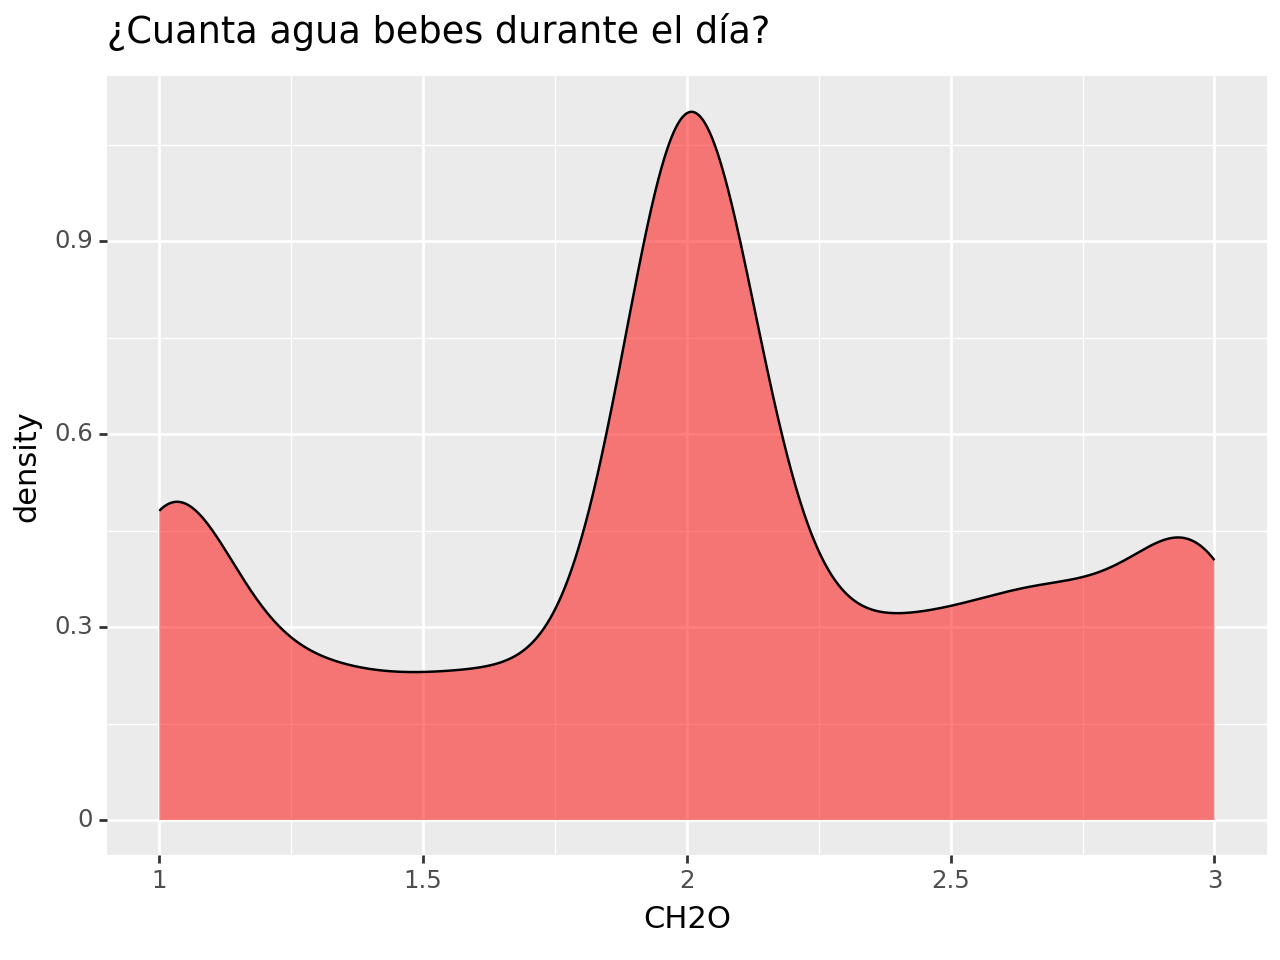


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [102]:
print(ggplot(obesidad, aes(x='CH2O')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='¿Cuanta agua bebes durante el día?')
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [103]:
def litros(agua):
    if agua <= 1.5:
        return "Menos de 1L"
    elif agua <= 2.5:
        return "1L-2L"
    else:
        return "Más de 2L"

obesidad['water'] = obesidad['CH2O'].apply(litros)
orden_categorias = ["Menos de 1L","1L-2L","Más de 2L"]
obesidad['water'] = pd.Categorical(obesidad['water'], categories=orden_categorias, ordered=True)

C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\4265755954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\4265755954.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [104]:
print(obesidad['water'].unique())

['1L-2L', 'Más de 2L', 'Menos de 1L']
Categories (3, object): ['Menos de 1L' < '1L-2L' < 'Más de 2L']


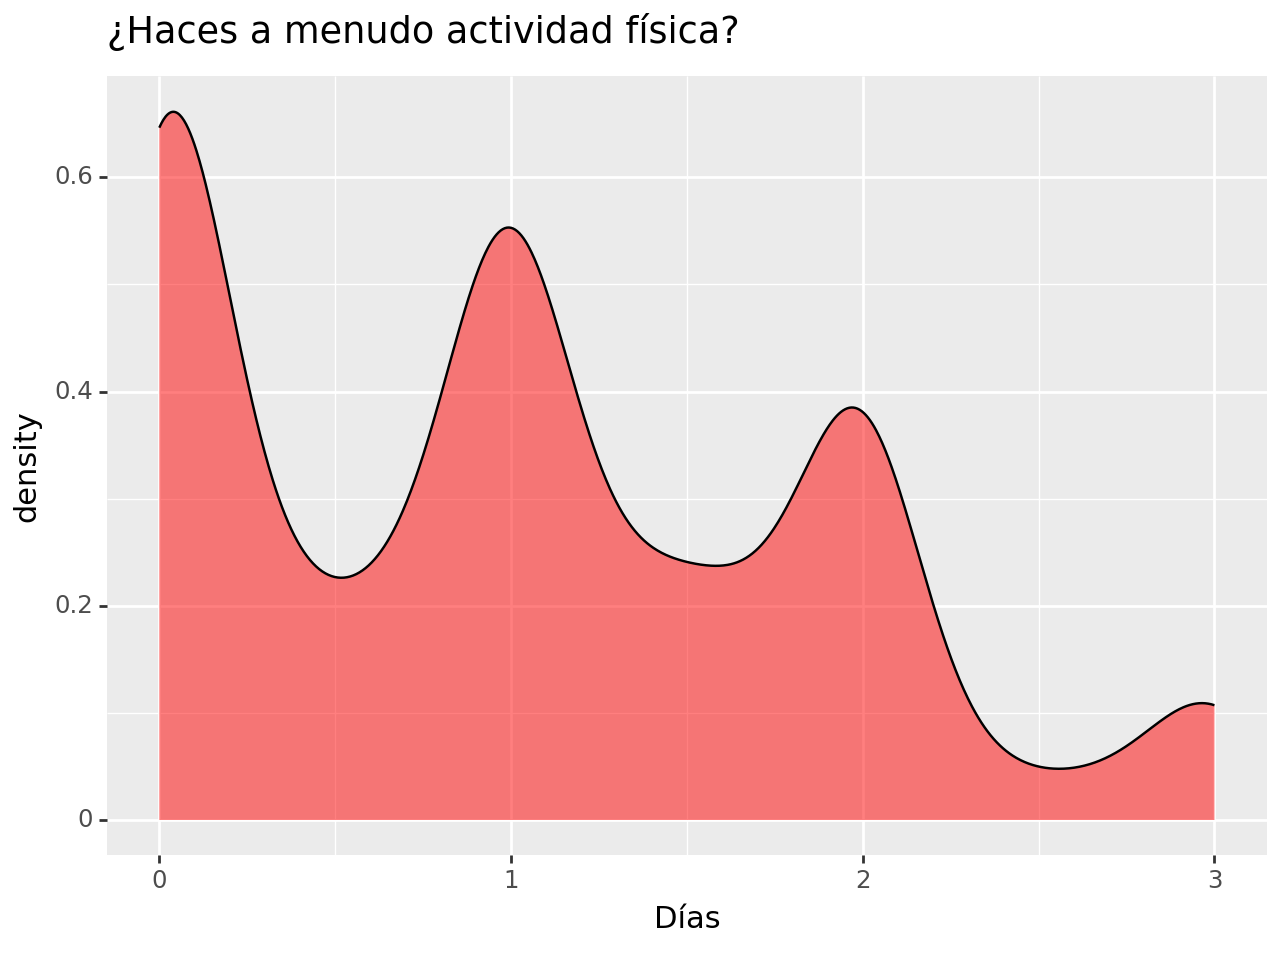


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [105]:
print(ggplot(obesidad, aes(x='FAF')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(x='Días',title='¿Haces a menudo actividad física?')
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [106]:
def ejercicio(deporte):
    if deporte <= 0.5:
        return "No hago"
    elif deporte <= 1.5:
        return "1d-2d"
    elif deporte <= 2.5:
        return "2d-4d"
    else:
        return "4d-5d"

obesidad['physical_activity'] = obesidad['FAF'].apply(ejercicio)
orden_categorias = ["No hago","1d-2d","2d-4d","4d-5d"]
obesidad['physical_activity'] = pd.Categorical(obesidad['physical_activity'], categories=orden_categorias, ordered=True)
print(obesidad['physical_activity'].unique())

['No hago', '4d-5d', '2d-4d', '1d-2d']
Categories (4, object): ['No hago' < '1d-2d' < '2d-4d' < '4d-5d']


C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\2116157306.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\2116157306.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


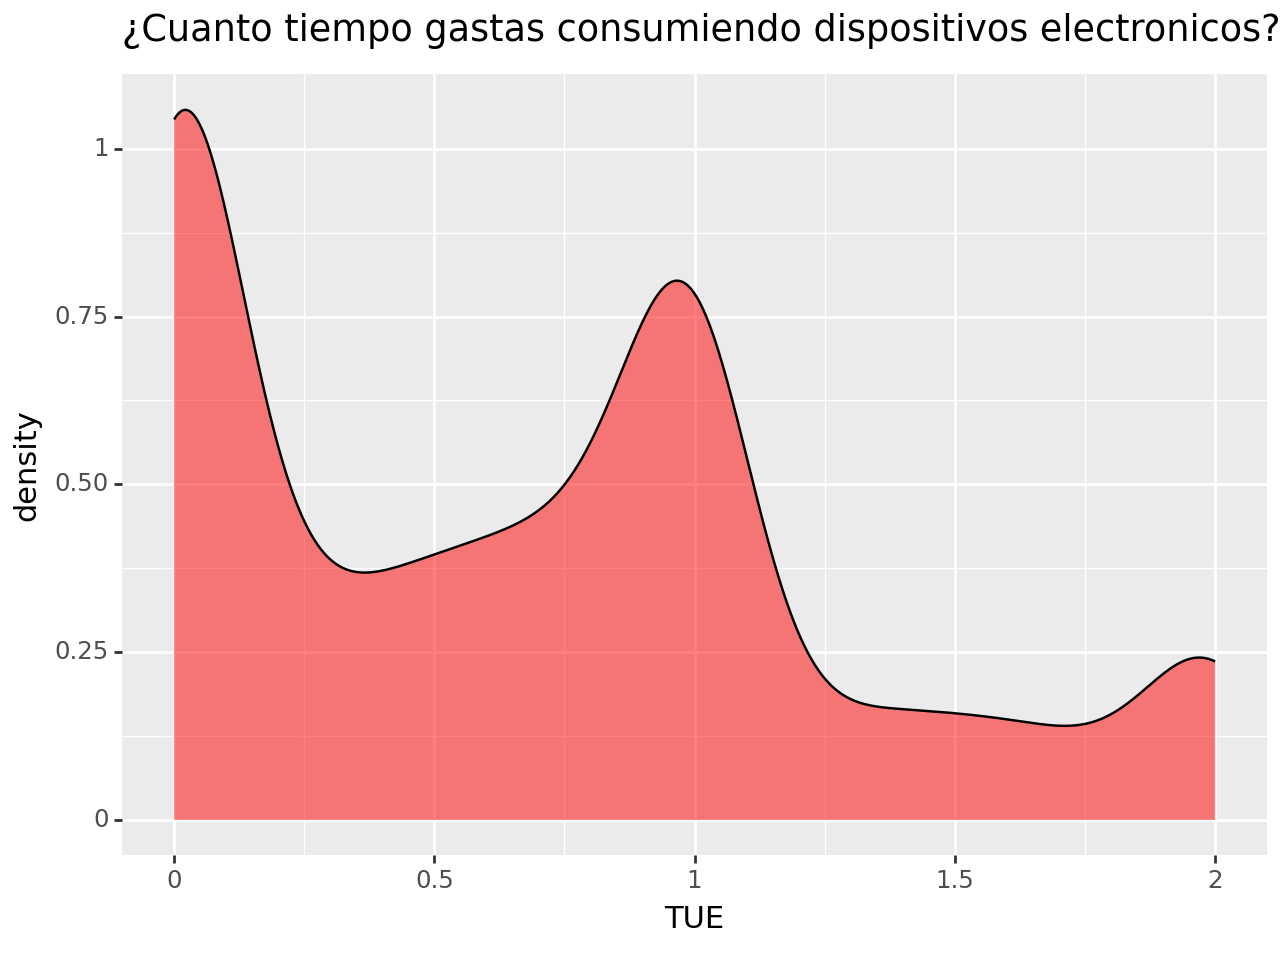


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [107]:
print(ggplot(obesidad, aes(x='TUE')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='¿Cuanto tiempo gastas consumiendo dispositivos electronicos?')
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [108]:
def electronica(movil):
    if movil <= 0.5:
        return "0-2h"
    elif movil <= 1.5:
        return "3-5h"
    else:
        return "Más de 5h"

obesidad['electronica'] = obesidad['TUE'].apply(electronica)
orden_categorias = ["0-2h","3-5h","Más de 5h"]
obesidad['electronica'] = pd.Categorical(obesidad['electronica'], categories=orden_categorias, ordered=True)
print(obesidad['electronica'].unique())

['3-5h', '0-2h', 'Más de 5h']
Categories (3, object): ['0-2h' < '3-5h' < 'Más de 5h']


C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\2799942739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\2799942739.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


De esta manera tenemos pasadas a categóricas todas la variable que deben de ser así

In [109]:
columnas_no_numericas=obesidad.select_dtypes(exclude='number').columns
for campo in columnas_no_numericas:
    print(obesidad[campo].unique())
print('Entre los campos no numéricos no se ve ningún elemento incorrecto')

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, object): ['no' < 'Sometimes' < 'Frequently' < 'Always']
['no' 'yes']
['no' 'yes']
['no', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['no' < 'Sometimes' < 'Frequently' < 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, object): ['Insufficient_Weight' < 'Normal_Weight' < 'Overweight_Level_I' < 'Overweight_Level_II' < 'Obesity_Type_I' < 'Obesity_Type_II' < 'Obesity_Type_III']
['Algunas veces', 'Siempre', 'Nunca']
Categories (3, object): ['Nunca' < 'Algunas veces' < 'Siempre']
['Tres', 'Entre 1 y 2', 'Más de tres']
Categories (3, object): ['Entre 1 y 2' < 'Tres' < 'Más de tres']
['1L-2L', 'Más de 2L', 'Menos de 1L']
Categories (3, object): ['Menos de 1L' < '1L-2L' < 'Más de 2L']
['No hag

In [110]:
obesidad.rename(columns={'CALC':'alcohol'}, inplace=True)
obesidad_limpio=obesidad[['gender', 'age', 'height', 'weight', 'family_history_with_overweight','FAVC','vegetables','comidas','CAEC','SMOKE','water','SCC','physical_activity','electronica','alcohol','obesity_type']]

C:\Users\alexb\AppData\Local\Temp\ipykernel_2696\3686228969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [111]:
obesidad_limpio.head(3)

,gender,age,height,weight,family_history_with_overweight,FAVC,vegetables,comidas,CAEC,SMOKE,water,SCC,physical_activity,electronica,alcohol,obesity_type
0,Female,21.0,1.62,64.0,yes,no,Algunas veces,Tres,Sometimes,no,1L-2L,no,No hago,3-5h,no,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,Siempre,Tres,Sometimes,yes,Más de 2L,yes,4d-5d,0-2h,Sometimes,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,Algunas veces,Tres,Sometimes,no,1L-2L,no,2d-4d,3-5h,Frequently,Normal_Weight


In [131]:
obesidad_limpio.to_csv('obesity_limpio.csv', index=False)

### 1er Insight

¿Como evoluciona el nivel de ingesta de alcohol, actividad fisica, consumo de agua y vegetales según sea el nivel de obesidad?¿Hay algun patrón?

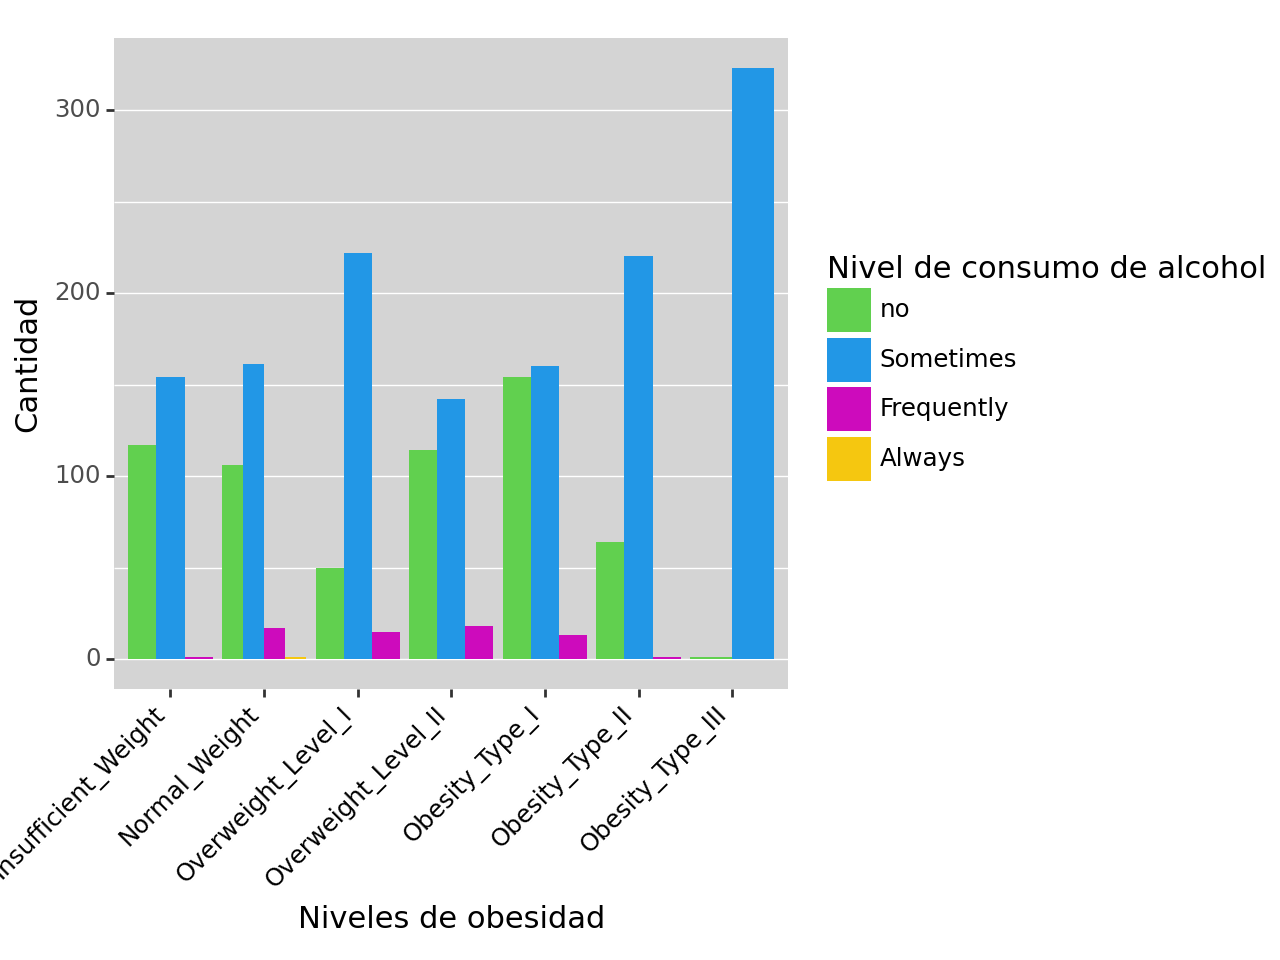

<Figure Size: (640 x 480)>

In [130]:
def fun(obesidad_limpio,columna):
    return (ggplot(obesidad_limpio[['obesity_type',columna]], aes(x='obesity_type', fill=f'factor({columna})')) + 
        geom_bar(position='dodge') + 
        scale_fill_manual(values=["#61D04F", "#2297E6", "#CD0BBC",'#F5C710'],name = "Nivel de consumo de alcohol")+
        theme(axis_text_x = element_text(angle = 45, hjust = 1,color = "black"),
              panel_grid_major_x=element_blank(),
              panel_background=element_rect(fill='#d4d4d4'),
              panel_grid_major_y=element_line(size=0.5))+
        labs(x='Niveles de obesidad', y='Cantidad')
        )
fun(obesidad_limpio,'vegetables')
fun(obesidad_limpio,'water')
fun(obesidad_limpio,'physical_activity')
fun(obesidad_limpio,'alcohol')

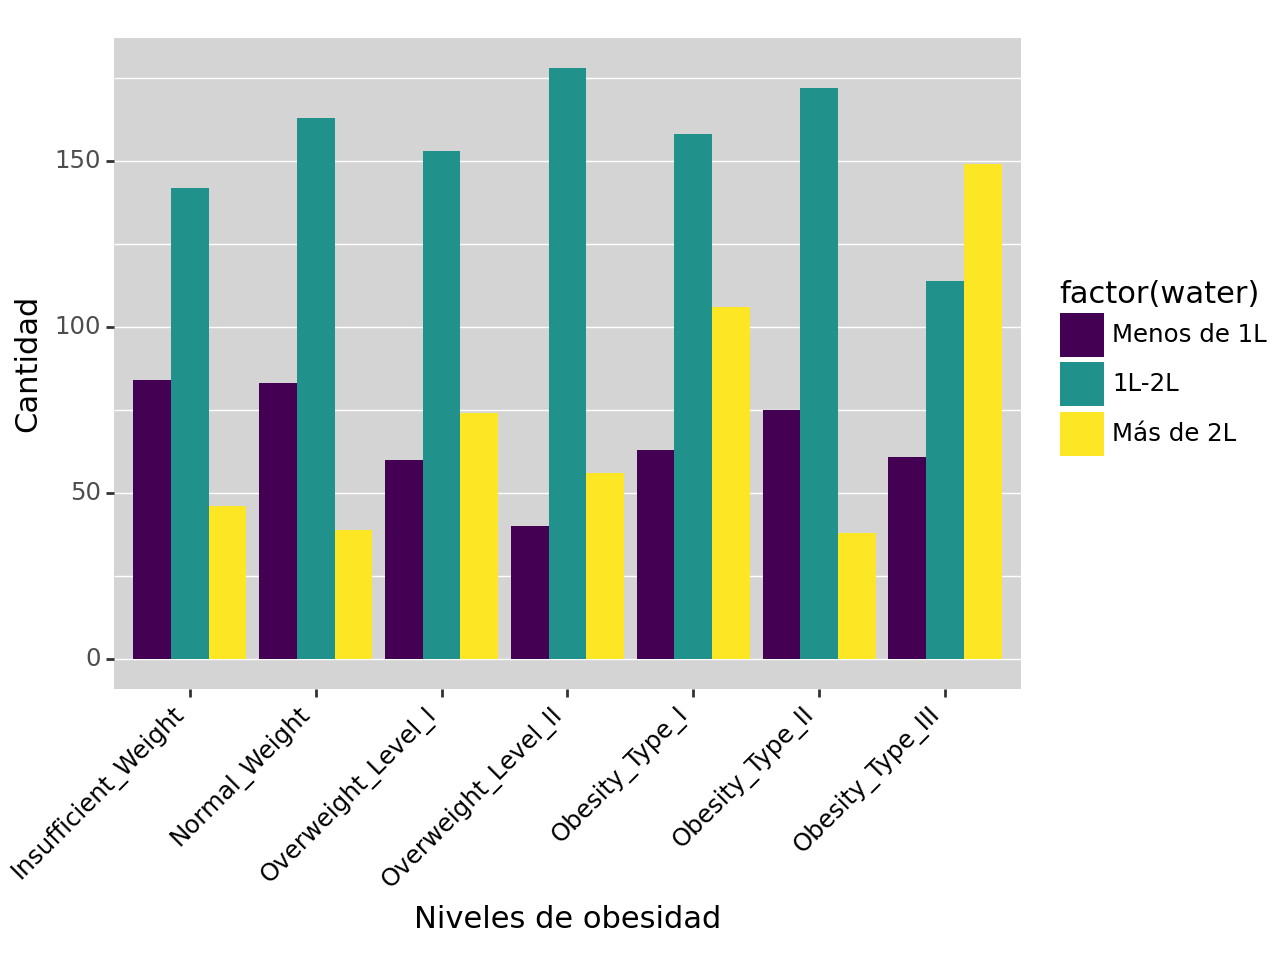

<Figure Size: (640 x 480)>

In [132]:

(ggplot(obesidad_limpio[['obesity_type','water']], aes(x='obesity_type', fill='factor(water)')) + 
        geom_bar(position='dodge') + 
        theme(axis_text_x = element_text(angle = 45, hjust = 1,color = "black"),
              panel_grid_major_x=element_blank(),
              panel_background=element_rect(fill='#d4d4d4'),
              panel_grid_major_y=element_line(size=0.5))+
        labs(x='Niveles de obesidad', y='Cantidad')
        )